# Kannada mnist using cnn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, BatchNormalization, Dropout, MaxPooling2D
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

### Read data

In [26]:
#  https://www.kaggle.com/competitions/Kannada-MNIST/data
train_data = pd.read_csv('./data/Kannada-MNIST/Dig-MNIST.csv')
# print(train_data.head(2))
train_data.info()
Y = train_data["label"]
X = train_data.drop(columns=["label"], axis=1)
print(train_data.head(2))
# print(X.shape)
# print(X.iloc[0].shape)
# print(X.head(2))
test_data = pd.read_csv('./data/Kannada-MNIST/test.csv')
test_X = test_data.drop(columns=["id"], axis=1)
# print(test_data.head(2))

print(X.dtypes)
print(Y.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 61.3 MB
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      0       0       0       0       0       0       0       0       0   
1      1       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  

[2 rows x 785 columns]
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 784, dtype: objec

### Analyze data

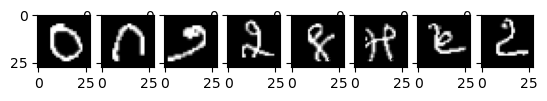

In [14]:
for i in range(8):
    plt.subplot(1,8,i+ 1)    
    plt.imshow(X.values[i].reshape(28,28), cmap='gray') 

### Transform data

In [23]:
X = X/255
X_train = X.values.reshape(-1, 28,28, 1)
Y_train = to_categorical(Y)
print(type(X_train))
print(type(Y_train))


test_X = test_X/255
test_X = test_X.values.reshape(-1, 28,28, 1)




<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Train model

In [16]:
print(Y_train[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [24]:
def MyCnn():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same',activation='relu', input_shape=(28,28,1)))
    model.add(BatchNormalization(momentum=0.1))
    model.add(MaxPooling2D((2,2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same',activation='relu'))
    model.add(BatchNormalization(momentum=0.1))
    model.add(MaxPooling2D((2,2)))

    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same',activation='relu'))
    model.add(BatchNormalization(momentum=0.1))
    model.add(MaxPooling2D((2,2)))
    
    # fully connected layer
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    # converge algorithm
    optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
    model.compile(optimizer=optimizer, loss=['categorical_crossentropy'], metrics=['accuracy'])
    
    return model

model = MyCnn()
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_9 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_10 (Ba  (None, 14, 14, 64)        256       
 tchNormalization)                                               
                                                      

### Evaluate model

In [25]:
model.fit(X_train, Y_train,batch_size=64, epochs=5)

Epoch 1/5
160/160 [==============================] - 3s 12ms/step - loss: 0.4824 - accuracy: 0.8525
Epoch 2/5
160/160 [==============================] - 2s 12ms/step - loss: 0.1748 - accuracy: 0.9484
Epoch 3/5
160/160 [==============================] - 2s 12ms/step - loss: 0.1109 - accuracy: 0.9676
Epoch 4/5
160/160 [==============================] - 2s 12ms/step - loss: 0.0786 - accuracy: 0.9759
Epoch 5/5
160/160 [==============================] - 2s 12ms/step - loss: 0.0489 - accuracy: 0.9866


### Predit on test dataset


### Output

In [ ]:

# df = pd.DataFrame()
# df.to_csv('submission.csv',index = False, header=True)